<h5>Loading the stock data <h5>

In [43]:
# !pip install pandas-datareader
# !pip install yfinance 
!pip install famafrench


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/67.5 kB ? eta -:--:--
   ---------------------------------------- 67.5/67.5 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
   ---------------------------------------- 107.

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sanap\\AppData\\Roaming\\Python\\Python311\\site-packages\\psycopg2\\_psycopg.cp311-win_amd64.pyd'
Check the permissions.



In [1]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [2]:
start = dt.date(2000,1,1)
end = dt.datetime.now()
stocks = "AAPL"


In [3]:
df = yf.download(stocks, start=start, end=end)['Adj Close']
print(df)

[*********************100%%**********************]  1 of 1 completed

Date
2000-01-03      0.844004
2000-01-04      0.772846
2000-01-05      0.784155
2000-01-06      0.716296
2000-01-07      0.750226
                 ...    
2024-08-19    225.889999
2024-08-20    226.509995
2024-08-21    226.399994
2024-08-22    224.529999
2024-08-23    226.839996
Name: Adj Close, Length: 6200, dtype: float64


<h5> Visualizing the returns</h5>

<Axes: xlabel='Date'>

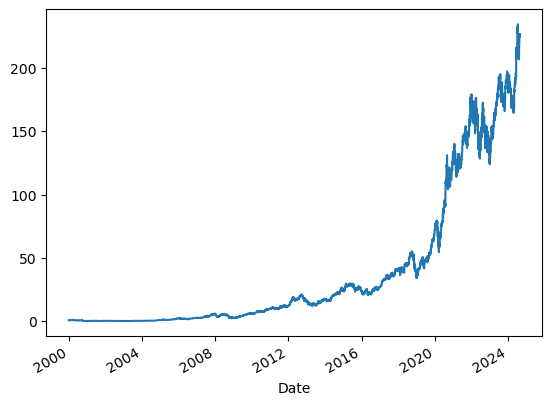

In [4]:
df.plot()
#Absolute price changes

In [7]:
#Lets get the daily returns now 
daily_return = df.pct_change()
daily_return 

Date
2000-01-03         NaN
2000-01-04   -0.084310
2000-01-05    0.014633
2000-01-06   -0.086538
2000-01-07    0.047369
                ...   
2024-08-19   -0.000708
2024-08-20    0.002745
2024-08-21   -0.000486
2024-08-22   -0.008260
2024-08-23    0.010288
Name: Adj Close, Length: 6200, dtype: float64

<Axes: xlabel='Date'>

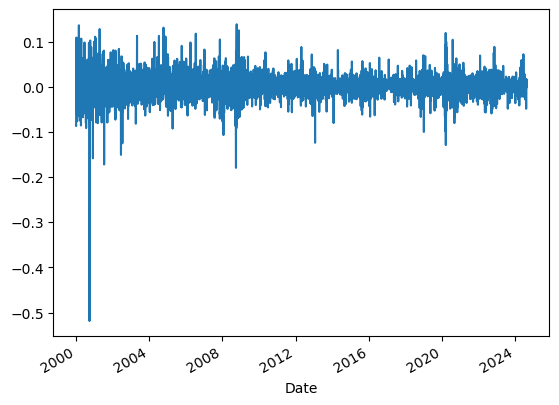

In [9]:
daily_return.plot() #Showcases the volatality

In [10]:
#to comapare stock returns of two companies together 
stocks = ["AAPL", "MSFT"] #make a list
df = yf.download(stocks, start=start, end=end)['Adj Close']
print(df)

[*********************100%%**********************]  2 of 2 completed

Ticker            AAPL        MSFT
Date                              
2000-01-03    0.844004   35.935863
2000-01-04    0.772846   34.721935
2000-01-05    0.784155   35.088051
2000-01-06    0.716296   33.912663
2000-01-07    0.750226   34.355850
...                ...         ...
2024-08-14  221.720001  416.109985
2024-08-15  224.720001  421.029999
2024-08-16  226.050003  418.470001
2024-08-19  225.889999  421.529999
2024-08-20  226.089996  422.720001

[6197 rows x 2 columns]


<Axes: xlabel='Date'>

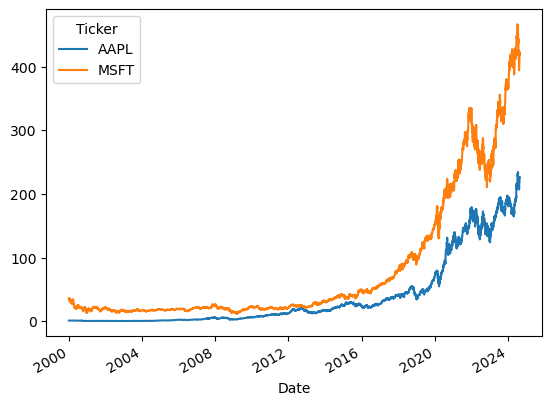

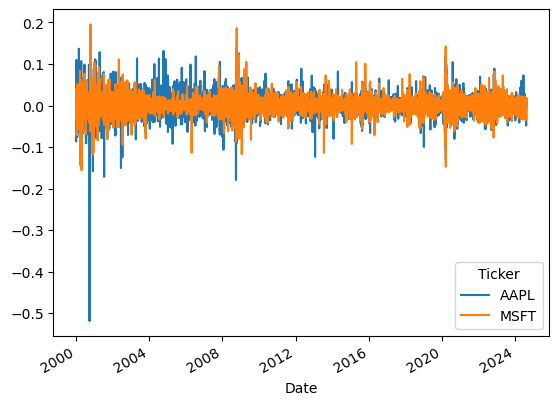

In [13]:
df.plot()
daily_return = df.pct_change()
daily_return.plot()
#MISLEADING AS THEY MIGHT HAVE DIFFERENT STARTING PRICES 

In [16]:
daily_cum_returns = (daily_return + 1).cumprod()
daily_cum_returns

Ticker,AAPL,MSFT
Date,,
2000-01-03,NaN,NaN
2000-01-04,0.915690,0.966220
2000-01-05,0.929090,0.976408
2000-01-06,0.848688,0.943700
2000-01-07,0.888889,0.956032
...,...,...
2024-08-14,262.700186,11.579240
2024-08-15,266.254672,11.716151
2024-08-16,267.830496,11.644913


<Axes: xlabel='Date'>

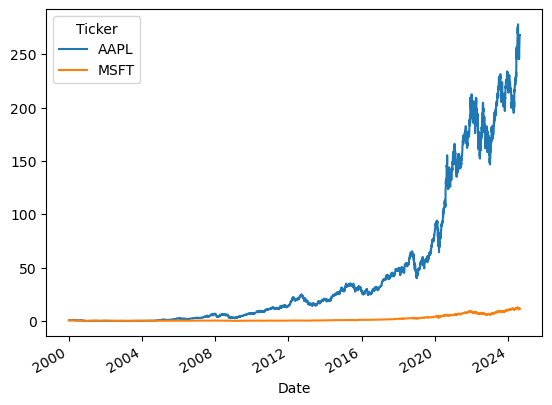

In [17]:
daily_cum_returns.plot()

You can clearly see that Apple (AAPL) has significantly outperformed Microsoft (MSFT) over the given period. This difference is much easier to interpret using cumulative returns than it would be if you were looking at absolute prices, which might suggest similar performance simply because of different starting prices.

<h3> Captial asset pricing model </h3>

In the CAPM formula:

\[
\overline{R_a} = R_f + \beta \left(\overline{R_m} - R_f\right)
\]

- \( \overline{R_a} \) is the expected return on an asset.
- \( R_f \) is the risk-free rate, often derived from government bonds.
- \( \beta \) represents the volatility or risk of the asset relative to the market.
- \( \overline{R_m} - R_f \) is the market risk premium, representing the excess return that investors expect for taking on the higher risk of the market compared to risk-free investments.

By calculating \( \overline{R_m} \), you can determine the expected market return, which is essential for comparing against individual stocks or portfolios to understand their risk-adjusted performance.
 performance.


In [42]:
end = dt.datetime.now()
start = dt.date(end.year-5, end.month, end.day)
Input = ["MSFT", "^GSPC"]
df = yf.download(Input, start=start, end=end)['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [26]:
df #gspc is ticker for s$p500?

Ticker,MSFT,^GSPC
Date,,
2019-08-21,132.565247,2924.429932
2019-08-22,131.600555,2922.949951
2019-08-23,127.407440,2847.110107
2019-08-26,129.375031,2878.379883
2019-08-27,129.652054,2869.159912
...,...,...
2024-08-14,416.109985,5455.209961
2024-08-15,421.029999,5543.220215
2024-08-16,418.470001,5554.250000


In [43]:
#to get monthly returns 
month_ret = df.resample("M").ffill().pct_change()
month_ret

Ticker,MSFT,^GSPC
Date,,
2019-08-31,NaN,NaN
2019-09-30,0.008487,0.017181
2019-10-31,0.031216,0.020432
2019-11-30,0.059463,0.034047
2019-12-31,0.041749,0.028590
...,...,...
2024-04-30,-0.074610,-0.041615
2024-05-31,0.068191,0.048021
2024-06-30,0.076651,0.034670


we notice that the first row is Nan because of the forward fill function ffill() . 

In [44]:
month_ret.dropna(axis=0)

Ticker,MSFT,^GSPC
Date,,
2019-09-30,0.008487,0.017181
2019-10-31,0.031216,0.020432
2019-11-30,0.059463,0.034047
2019-12-31,0.041749,0.028590
2020-01-31,0.079455,-0.001628
2020-02-29,-0.045688,-0.084110
2020-03-31,-0.026541,-0.125119
2020-04-30,0.136326,0.126844
2020-05-31,0.025391,0.045282


In [7]:
#Building the Regression model 
x = month_ret["^GSPC"]
y = month_ret["MSFT"]
#in statsmodels one has to define the constant term 
x_sm = sm.add_constant(x)

In [8]:
model = sm.OLS(y, x_sm)

MissingDataError: exog contains inf or nans

In [9]:
# Drop rows with NaNs in x_sm and y
x_sm_clean = x_sm.dropna()
y_clean = y[x_sm_clean.index]  # Align y with the cleaned x_sm

In [10]:
# Re-run the model with the cleaned data
model = sm.OLS(y_clean, x_sm_clean)
results = model.fit()

# Display the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     66.51
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           3.36e-11
Time:                        03:32:24   Log-Likelihood:                 103.23
No. Observations:                  60   AIC:                            -202.5
Df Residuals:                      58   BIC:                            -198.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0107      0.006      1.832      0.0

import seaborn as sns
sns.regplot(x = '^GSPC', y = 'MSFT', data= month_ret) #can turn off the CI by ci=none
plt.show()

In [45]:
#multifactor model famma french 3 factor model 
import pandas_datareader.data as web
ff_data = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start=start, end=end)

# Extract the monthly risk-free rate (RF)
rf_data = ff_data[0]['RF']


C:\Users\sanap\AppData\Roaming\Python\Python311\site-packages\pandas_datareader\famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)
C:\Users\sanap\AppData\Roaming\Python\Python311\site-packages\pandas_datareader\famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)


In [33]:
#subtracting the risk free rate to get the excess return 
#introducing new columns so 
# month_ret['MSFT-rf'],month_ret['^GSPC-rf'] = month_ret['MSFT']-rf_data.values, month_ret['^GSPC']-rf_data.values 
# month_ret
print(month_ret.shape)
print(rf_data.values.shape)


(61, 2)
(59,)


The reason for the error is a mismatch in the number of rows between month_ret and rf dataframes. By aligning these datasets on dates by perfoming a "inner join" ensures they have the same number of rows (i.e., the same dates). Then can then risk-free rate can easily be subtracted from monthly returns to calculate the excess returns.

In [20]:
# Align the data based on the index (which should be dates)
month_ret, rf_data = month_ret.align(rf_data, join='inner', axis=0)

# Subtract the risk-free rate to get the excess return
month_ret['MSFT-Rf'] = month_ret['MSFT'] - rf_data
month_ret['^GSPC-Rf'] = month_ret['^GSPC'] - rf_data

# Display the resulting DataFrame
print(month_ret)


Empty DataFrame
Columns: [MSFT, ^GSPC, MSFT-Rf, ^GSPC-Rf]
Index: []


In [29]:
print("month_ret date range:", month_ret.index.min(), "to", month_ret.index.max())
print("rf_data date range:", rf_data.index.min(), "to", rf_data.index.max())


month_ret date range: 2019-08-31 00:00:00 to 2024-08-31 00:00:00
rf_data date range: 2019-08 to 2024-06


In [35]:
print(month_ret.index)
print(rf_data.index)


DatetimeIndex(['2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
               '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31',
      

In [46]:
# Step 1: Convert DatetimeIndex to PeriodIndex with monthly frequency
month_ret.index = month_ret.index.to_period('M')

# Step 2: Align the data using inner join to keep only matching periods
aligned_month_ret, aligned_rf_data = month_ret.align(rf_data, join='inner', axis=0)

# Step 3: Subtract the risk-free rate to get the excess returns
aligned_month_ret['MSFT-Rf'] = aligned_month_ret['MSFT'] - aligned_rf_data
aligned_month_ret['^GSPC-Rf'] = aligned_month_ret['^GSPC'] - aligned_rf_data


# Display the resulting DataFrame
print(aligned_month_ret)

Ticker       MSFT     ^GSPC   MSFT-Rf  ^GSPC-Rf
Date                                           
2019-08       NaN       NaN       NaN       NaN
2019-09  0.008487  0.017181 -0.171513 -0.162819
2019-10  0.031216  0.020432 -0.128784 -0.139568
2019-11  0.059463  0.034047 -0.060537 -0.085953
2019-12  0.041749  0.028590 -0.098251 -0.111410
2020-01  0.079455 -0.001628 -0.050545 -0.131628
2020-02 -0.045688 -0.084110 -0.165688 -0.204110
2020-03 -0.026541 -0.125119 -0.156541 -0.255119
2020-04  0.136326  0.126844  0.136326  0.126844
2020-05  0.025391  0.045282  0.015391  0.035282
2020-06  0.110559  0.018388  0.100559  0.008388
2020-07  0.007371  0.055101 -0.002629  0.045101
2020-08  0.102752  0.070065  0.092752  0.060065
2020-09 -0.067397 -0.039228 -0.077397 -0.049228
2020-10 -0.037370 -0.027666 -0.047370 -0.037666
2020-11  0.060061  0.107546  0.050061  0.097546
2020-12  0.039006  0.037121  0.029006  0.027121
2021-01  0.042892 -0.011137  0.032892 -0.021137
2021-02  0.004118  0.026091  0.004118  0

In [47]:
aligned_month_ret.dropna(how='any', axis = 0)

Ticker,MSFT,^GSPC,MSFT-Rf,^GSPC-Rf
Date,,,,
2019-09,0.008487,0.017181,-0.171513,-0.162819
2019-10,0.031216,0.020432,-0.128784,-0.139568
2019-11,0.059463,0.034047,-0.060537,-0.085953
2019-12,0.041749,0.028590,-0.098251,-0.111410
2020-01,0.079455,-0.001628,-0.050545,-0.131628
2020-02,-0.045688,-0.084110,-0.165688,-0.204110
2020-03,-0.026541,-0.125119,-0.156541,-0.255119
2020-04,0.136326,0.126844,0.136326,0.126844
2020-05,0.025391,0.045282,0.015391,0.035282


<h3> Building the regression again </h3>

In [49]:
x= aligned_month_ret['^GSPC-Rf']
y = aligned_month_ret['MSFT-Rf']
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm)
results = model.fit()
results.summary

MissingDataError: exog contains inf or nans

In [50]:
x_sm_clean = x_sm.dropna()
y_clean = y[x_sm_clean.index]  # Align y with the cleaned x_sm
# Re-run the model with the cleaned data
model = sm.OLS(y_clean, x_sm_clean)
results = model.fit()

# Display the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                MSFT-Rf   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1030.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           9.57e-38
Time:                        04:49:02   Log-Likelihood:                 100.58
No. Observations:                  58   AIC:                            -197.2
Df Residuals:                      56   BIC:                            -193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0076      0.008      1.017      0.3

Strong Market Relationship: The high R-squared value and significant coefficient indicate that Microsoft's excess return is very closely related to the excess return of the broader market (as represented by the S&P 500).
Model Strength: The regression model is statistically significant and explains a large portion of the variability in Microsoft's excess returns.
Practical Implication: For an investor, this model suggests that Microsoft's returns are highly dependent on market movements, with a near-proportional response to changes in the S&P 500's excess return.
This output aligns with expectations for a company like Microsoft, which typically moves in sync with broader market trends.








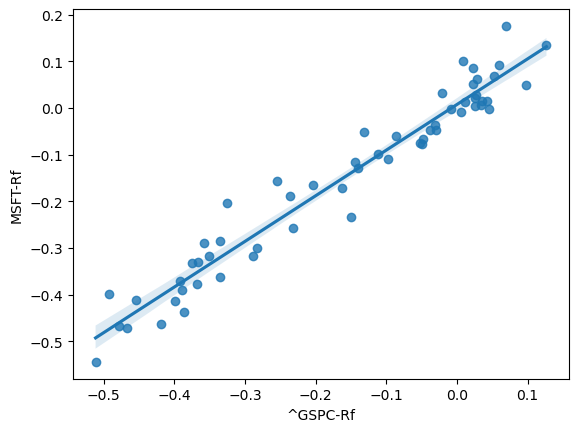

In [54]:
sns.regplot(x = '^GSPC-Rf', y = 'MSFT-Rf', data= aligned_month_ret )
plt.show()

<h3> Famma French 3 Factor Mode for FIDELITY  </h3>
<h3> Now incorporating the size effect and value effect SMB , HML </h3>
SNB is "Small minus big" captures the size effect which is small capitalization stocks outperform large capitalization stocks over the long term. High book value to market  value , 

In [5]:
# lets get the return data for fidelity
end = dt.datetime.now()
start = dt.date(end.year-5, end.month, end.day)
Input = "FDGRX"
df = yf.download(Input, start=start, end=end)['Adj Close'].pct_change()

[*********************100%%**********************]  1 of 1 completed


In [6]:
# Step 2: Adjust returns for compounding and resample by month
monthly_return = (df + 1).resample('M').prod() - 1
#can also be performed using a lamba function  .agg(lambda x: (x+1).prod()-1)
# Display the result
monthly_return = monthly_return[:-2]
monthly_return


Date
2019-08-31    0.012352
2019-09-30   -0.016777
2019-10-31    0.038780
2019-11-30    0.072175
2019-12-31    0.029354
2020-01-31    0.027622
2020-02-29   -0.044191
2020-03-31   -0.102479
2020-04-30    0.183749
2020-05-31    0.101839
2020-06-30    0.077769
2020-07-31    0.081224
2020-08-31    0.126136
2020-09-30   -0.033199
2020-10-31   -0.028562
2020-11-30    0.138751
2020-12-31    0.037423
2021-01-31    0.013995
2021-02-28    0.020702
2021-03-31   -0.010288
2021-04-30    0.064449
2021-05-31   -0.011719
2021-06-30    0.073687
2021-07-31    0.003681
2021-08-31    0.045062
2021-09-30   -0.050890
2021-10-31    0.082673
2021-11-30    0.017321
2021-12-31   -0.033867
2022-01-31   -0.111873
2022-02-28   -0.033344
2022-03-31    0.037368
2022-04-30   -0.144397
2022-05-31   -0.040662
2022-06-30   -0.086647
2022-07-31    0.119507
2022-08-31   -0.034850
2022-09-30   -0.099582
2022-10-31    0.065428
2022-11-30    0.049128
2022-12-31   -0.089017
2023-01-31    0.106175
2023-02-28   -0.012450
2023-0

In [7]:
factors = reader.DataReader('F-F_Research_Data_Factors', 'famafrench', start, end)

C:\Users\sanap\AppData\Roaming\Python\Python311\site-packages\pandas_datareader\famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)
C:\Users\sanap\AppData\Roaming\Python\Python311\site-packages\pandas_datareader\famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)


In [8]:
#Here we get a dictionary 
factors

{0:          Mkt-RF   SMB    HML    RF
 Date                              
 2019-08   -2.58 -2.39  -4.79  0.16
 2019-09    1.43 -0.96   6.75  0.18
 2019-10    2.06  0.30  -1.90  0.16
 2019-11    3.88  0.79  -2.01  0.12
 2019-12    2.77  0.74   1.77  0.14
 2020-01   -0.11 -3.12  -6.28  0.13
 2020-02   -8.13  1.07  -3.80  0.12
 2020-03  -13.38 -4.82 -13.83  0.13
 2020-04   13.65  2.46  -1.34  0.00
 2020-05    5.58  2.49  -4.86  0.01
 2020-06    2.46  2.69  -2.21  0.01
 2020-07    5.77 -2.31  -1.41  0.01
 2020-08    7.63 -0.24  -2.97  0.01
 2020-09   -3.63  0.02  -2.70  0.01
 2020-10   -2.10  4.38   4.23  0.01
 2020-11   12.47  5.80   2.06  0.01
 2020-12    4.63  4.88  -1.51  0.01
 2021-01   -0.03  7.37   3.04  0.01
 2021-02    2.78  2.06   7.09  0.00
 2021-03    3.08 -2.36   7.40  0.00
 2021-04    4.93 -3.19  -0.97  0.00
 2021-05    0.29 -0.21   7.08  0.00
 2021-06    2.75  1.66  -7.84  0.00
 2021-07    1.27 -3.97  -1.84  0.00
 2021-08    2.91 -0.41  -0.19  0.00
 2021-09   -4.37  0.68   

In [9]:
#We are interested in the first index i.e. the zeroth index as those are the monthly returns 
factors = factors[0]

In [10]:
monthly_return.index = factors.index

In [11]:
#merge monthly return df with factors
merge = pd.merge(monthly_return, factors, on = 'Date' )
merge


,Adj Close,Mkt-RF,SMB,HML,RF
Date,,,,,
2019-08,0.012352,-2.58,-2.39,-4.79,0.16
2019-09,-0.016777,1.43,-0.96,6.75,0.18
2019-10,0.038780,2.06,0.30,-1.90,0.16
2019-11,0.072175,3.88,0.79,-2.01,0.12
2019-12,0.029354,2.77,0.74,1.77,0.14
2020-01,0.027622,-0.11,-3.12,-6.28,0.13
2020-02,-0.044191,-8.13,1.07,-3.80,0.12
2020-03,-0.102479,-13.38,-4.82,-13.83,0.13
2020-04,0.183749,13.65,2.46,-1.34,0.00


In [12]:
# the data from famma french , theyre in percent we need to divide by 100  
merge[['Mkt-RF','SMB','HML', 'RF']] = merge[['Mkt-RF','SMB','HML', 'RF']]/100 #Double Square Brackets are necessary when selecting multiple columns from a DataFrame.
#Single Square Brackets would be used to select a single column, returning a Series.
merge

,Adj Close,Mkt-RF,SMB,HML,RF
Date,,,,,
2019-08,0.012352,-0.0258,-0.0239,-0.0479,0.0016
2019-09,-0.016777,0.0143,-0.0096,0.0675,0.0018
2019-10,0.038780,0.0206,0.0030,-0.0190,0.0016
2019-11,0.072175,0.0388,0.0079,-0.0201,0.0012
2019-12,0.029354,0.0277,0.0074,0.0177,0.0014
2020-01,0.027622,-0.0011,-0.0312,-0.0628,0.0013
2020-02,-0.044191,-0.0813,0.0107,-0.0380,0.0012
2020-03,-0.102479,-0.1338,-0.0482,-0.1383,0.0013
2020-04,0.183749,0.1365,0.0246,-0.0134,0.0000


<h3>SMB</h3>
SMB measures the extra returns that investors have historically received by investing in smaller companies (small-cap stocks) instead of larger companies (large-cap stocks). Think of SMB as a way to capture the size effect in the stock market. Smaller companies often have higher potential for growth, which means they can provide higher returns. However, they are also riskier. SMB shows the difference in performance between small and large companies. If SMB is positive, it means small companies performed better than large companies over the period in question.
<h3>HML</h3>
HML measures the extra returns that investors have historically received by investing in "value" stocks, which are stocks with high book-to-price ratios, compared to "growth" stocks, which have low book-to-price ratios.
 Think of HML as capturing the value effect in the stock market. Value stocks are those that appear to be undervalued relative to their fundamentals (like assets or earnings). They are often cheaper and might be out of favor in the market, but historically, they have provided better returns than growth stocks, which are more expensive and popular because of their higher growth potential. HML shows the difference in performance between these value and growth stocks. If HML is positive, it means value stocks outperformed growth stocks over the period in question.
 <h3>RF</h3 >
RF is the Risk-free rate

$$
r_i - r_f = \alpha_i + \beta_i (r_m - r_f) + s_i \text{SMB} + h_i \text{HML} + \epsilon_i
$$


In [13]:

merge['FDGRX - RF'] = merge['Adj Close'] - merge['RF']

# Re-run the regression model
y = merge['FDGRX - RF']
x = merge[['Mkt-RF', 'SMB', 'HML']]
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm)
results = model.fit()

# Display the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             FDGRX - RF   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     358.0
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           4.78e-36
Time:                        11:09:16   Log-Likelihood:                 164.37
No. Observations:                  59   AIC:                            -320.7
Df Residuals:                      55   BIC:                            -312.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.002      3.068      0.0

The Fama-French three-factor regression model output provides insights into the performance of the fund (FDGRX) relative to three key factors:

- **R-squared:** 0.951, indicating that 95.1% of the variation in the fund's excess returns is explained by the model.
- **Alpha (const):** 0.0064, suggesting a positive abnormal return, or "alpha," when all factors are zero.
- **Market Excess Return (Mkt-RF):** Coefficient of 1.1472, showing that the fund is more volatile than the market.
- **SMB (Small Minus Big):** Coefficient of 0.1463, indicating a slight tilt towards small-cap stocks.
- **HML (High Minus Low):** Coefficient of -0.4396, revealing a preference for growth stocks over value stocks.

The negative HML coefficient suggests the fund tends to perform better when growth stocks outperform value stocks.
